In [1]:
import argparse
import collections
import numpy as np
import pims
import cellquant as cq
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.util import img_as_ubyte
from cellquant.smt import detect_blobs, detect_blobs_batch, fit_psf, fit_psf_batch
%matplotlib notebook

In [46]:
#############################
#Get the raw data 
#############################

path = ''
file = '20150618_wm9_A6_G3_NoDrug_hyb1-tile-0-0.tif'
im = imread(path+file)
tile_size = 1024
overlap = 100
channel = 3
n = 1
m = 0
tile = im[channel,n*(tile_size-overlap):(n+1)*(tile_size-overlap),n*(tile_size-overlap):(n+1)*(tile_size-overlap)]
tile = tile/tile.max()
tile = img_as_ubyte(tile)

Det in frame: 210


/home/cwseitz/anaconda3/envs/cellquant/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/cwseitz/anaconda3/envs/cellquant/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/cwseitz/anaconda3/envs/cellquant/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/cwseitz/anaconda3/envs/cellquant/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


<IPython.core.display.Javascript object>


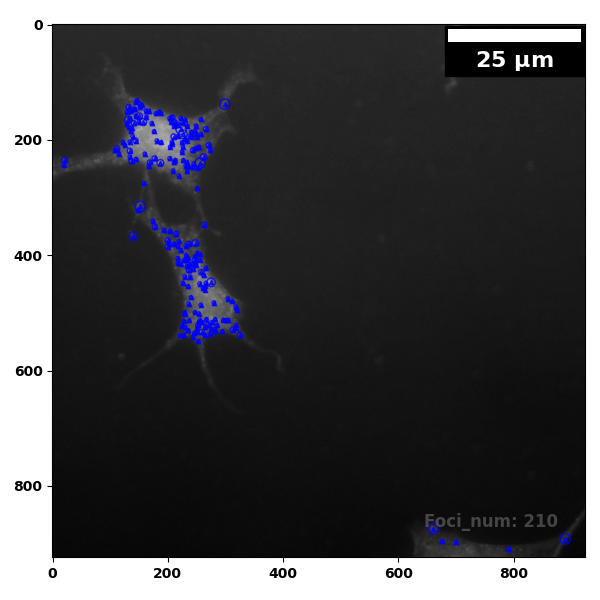

In [47]:
#initial example with a high threshold
blobs_df, plt_array = detect_blobs(tile,threshold=0.05,diagnostic=True,pixel_size=0.1083)

<IPython.core.display.Javascript object>


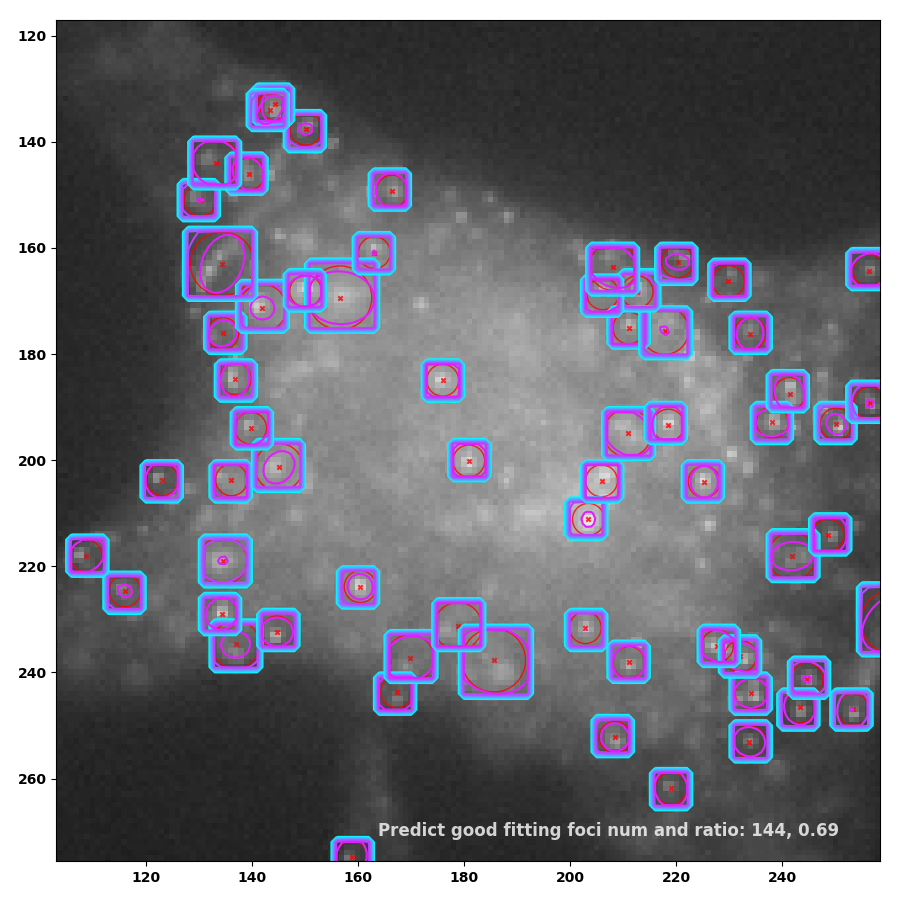

In [53]:
psf_df, plt_array, error_arr = fit_psf(tile,blobs_df,diagnostic=True,pltshow=True,error_diagnostic=False, diag_max_dist_err=10,diag_max_sig_to_sigraw=10)

In [49]:
csv_name = file.split('.')[0] +'-det.csv'
psf_df.to_csv(path+csv_name)

20150618_wm9_A6_G3_NoDrug_hyb1-tile-0-0-det.csv
